In [2]:
using Plots
using Makie
using GraphMakie.NetworkLayout
using CairoMakie
using Tenet
using TensorOperations
using LinearAlgebra
using Graphs
using GraphPlot
using EinExprs
using Combinatorics
using LaTeXStrings
Makie.inline!(true)
include("julia_functions.jl")


edge_weights_update_DRMG_chi_max (generic function with 1 method)

In [3]:



function replace_index(tensor, replace_inds, new_inds)
    
    mapping = Dict(zip(replace_inds, new_inds))
    #display(mapping)
    current_inds = inds(tensor)
    ids = []
    for id in current_inds
        if id in replace_inds
            push!(ids, mapping[id])
        else
            push!(ids, id)
        end
    end
    new_tensor = Tenet.Tensor(tensor.data, [ids...])
    return new_tensor
end


function extract_partial_tn_loop(TN, cycle, printing = false)
    tensors_in_loop = collect(Set([tensor for id in cycle for tensor in Tenet.select(TN, Symbol(id))])) #correct orderding of variable definitions
    current_tn = TensorNetwork(tensor for tensor in tensors_in_loop)
    #drawing1 = Makie.plot(current_tn, node_color=[:darkred for i in 1:length(tensors(current_tn))], labels=true, layout=Stress(), edge_color=:grey80)
    #display(drawing1)
    index_cut = Symbol(cycle[1])
    edge_tensors = Tenet.select(TN, index_cut)

    if printing == true
        drawing1 = Makie.plot(current_tn, node_color=[:darkred for i in 1:length(tensors(current_tn))], labels=true, layout=Stress(), edge_color=:grey80)
        display(drawing1)
    end

    
    return current_tn
end



function generate_unique_symbols(existing_indices::Vector{Symbol}, l::Int, min_value::Int=1, max_value::Int=200)

    """
    Function which generates a list of new symbols for index replacing capability
    """

    existing_integers = [parse(Int, string(id)) for id in existing_indices]
    potential_length = round(Int, 4*l)  # Generate at least twice the desired length
    new_symbols = []
    for i in 1:potential_length
        number = rand(min_value:max_value)
        if !in(number, existing_integers)
            if !in(number, new_symbols)
                push!(new_symbols, number)
            end
        end
        if length(new_symbols) == l
            new_symbols = [Symbol(new) for new in new_symbols]
            break
        end
    end


  
    return new_symbols
  
end

function collect_tensors_along_loop(loop_tn, index_cycle, edge_to_cut)

    """
    Funtion whcih sequentially walks along the loop and selects the relevant tensors
    """

    connectedtensors = Tenet.select(loop_tn, Symbol(edge_to_cut))
    firstsymbol = Symbol(index_cycle[1])
    for tensor in connectedtensors
        if !isempty(intersect(inds(tensor), [firstsymbol]))
            global start_tensor = tensor
        else
            global end_tensor = tensor
        end
    end
    tensors_ordered_loop = []
    for i in 1:length(tensors(loop_tn))
        if i == length(tensors(loop_tn))
            push!(tensors_ordered_loop, end_tensor)
            return tensors_ordered_loop
        end
        if i == 1
            push!(tensors_ordered_loop, start_tensor)
            continue
        end
        connecting_id = intersect(inds(tensors_ordered_loop[i-1]), [Symbol(id) for id in index_cycle])
        next_tensor = [tensorc for tensorc in Tenet.select(loop_tn, connecting_id)  if tensorc != tensors_ordered_loop[i-1]][1]
        index_cycle = filter(x -> x != parse(Int, string(connecting_id[1])), index_cycle)
        push!(tensors_ordered_loop, next_tensor)
    end
end


function create_index_isomorphismgroup(size_index1, size_index2, indices)
    n = size_index1*size_index2
    identity_data = Matrix{Int64}(I, n, n)
    tensor_isomorphism = reshape(identity_data, (size_index1, size_index2, n))
    println("A grouping has been created: ", indices[1:2], "==>", indices[3])
    identity_isomorphism = Tenet.Tensor(tensor_isomorphism, [(indices...)])
    return identity_isomorphism
end


function create_index_isomorphismsplit(propagation_size, cut_size, new_indices, propagation_index)
    size_id_to_tensor = convert(Int64, propagation_size/cut_size)
    size_loop_part = cut_size
    n = propagation_size
    identity_data = Matrix{Int64}(I, n, n)
    tensor_isomorphism = reshape(identity_data, (propagation_size, size_id_to_tensor, size_loop_part))
    println("A splitting has been created: ", propagation_index, "==>", new_indices[1:2])
    identity_isomorphism = Tenet.Tensor(tensor_isomorphism, [propagation_index, new_indices...])
    return identity_isomorphism
end



create_index_isomorphismsplit (generic function with 1 method)

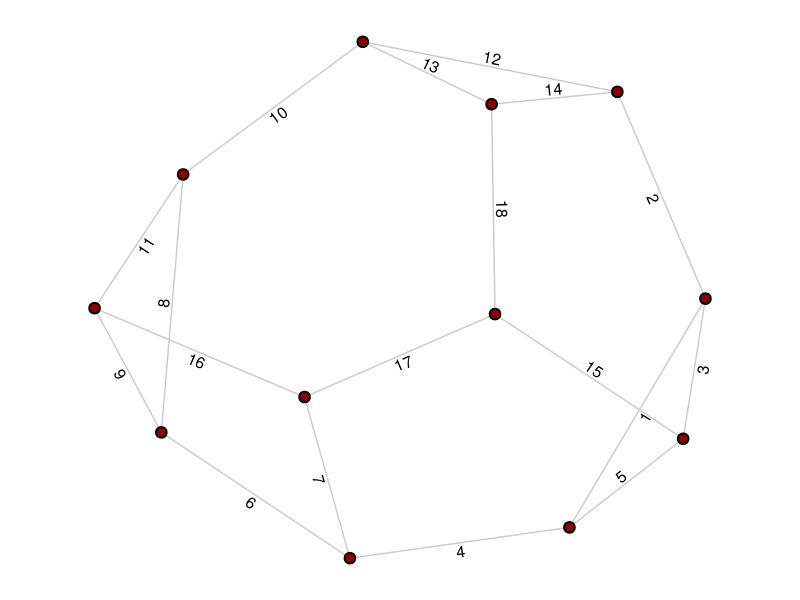

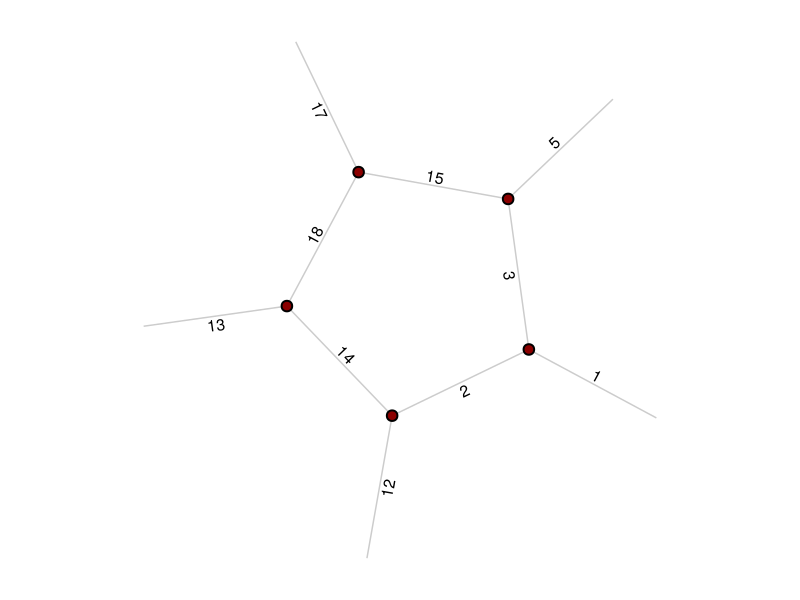

[3, 2, 14, 18]
[Symbol("3"), Symbol("5"), Symbol("15")]
[Symbol("1"), Symbol("2"), Symbol("3")]
[Symbol("2"), Symbol("12"), Symbol("14")]
[Symbol("13"), Symbol("14"), Symbol("18")]
[Symbol("15"), Symbol("17"), Symbol("18")]
[Symbol("3"), Symbol("15")]
A grouping has been created: [Symbol("87"), Symbol("121")]==>48
indices tensor 1[Symbol("87"), Symbol("5"), Symbol("121")]with sizes[3, 3, 3]
indices identity_1:[Symbol("87"), Symbol("121"), Symbol("48")]with sizes[3, 3, 9]
A splitting has been created: 48==>[Symbol("181"), Symbol("88")]
replacement legs:[Symbol("2"), Symbol("3")]
replacement legs:[Symbol("3"), Symbol("2")]
A grouping has been created: [Symbol("88"), Symbol("91")]==>31
indices identity_1_inv 1[Symbol("48"), Symbol("181"), Symbol("88")]with sizes[9, 3, 3]
indices tensor 2[Symbol("1"), Symbol("91"), Symbol("181")]with sizes[3, 3, 3]
indices identity 2[Symbol("88"), Symbol("91"), Symbol("31")]with sizes[3, 3, 9]
A splitting has been created: 31==>[Symbol("154"), Symbol("32")

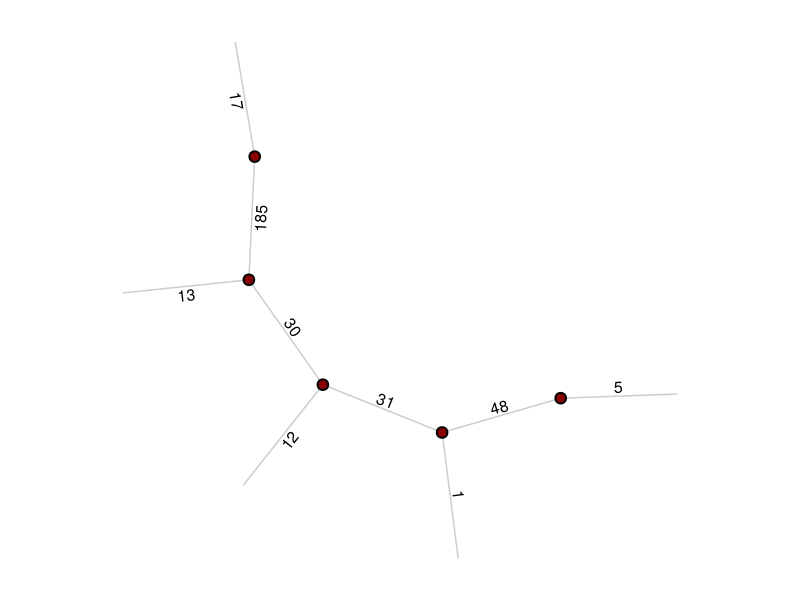

3×3×3×3×3 Tensor{Float64, 5, Array{Float64, 5}}:
[:, :, 1, 1, 1] =
  7.94453   7.28341  7.20326
  8.60182  10.1437   9.20576
 10.7015   10.0508   9.91118

[:, :, 2, 1, 1] =
 11.0154   8.46219   8.24062
 12.1776   9.93534   9.27194
 14.8597  11.2852   11.2345

[:, :, 3, 1, 1] =
 10.9599  6.47696  6.23682
 12.2089  7.86433  7.28472
 15.0671  8.72829  8.49893

[:, :, 1, 2, 1] =
  9.15437   8.52607   8.45189
  9.93693  11.9152   10.8252
 12.6485   12.0784   11.9153

[:, :, 2, 2, 1] =
 12.4813   9.56804   9.30419
 13.8618  11.1025   10.4106
 17.3151  13.1603   13.1136

[:, :, 3, 2, 1] =
 13.3132   7.8537    7.55855
 14.8022   9.45918   8.77986
 18.5678  10.7478   10.4642

[:, :, 1, 3, 1] =
 5.10672  4.78482  4.75961
 5.66915  6.98386  6.31597
 7.06688  6.84226  6.74384

[:, :, 2, 3, 1] =
  7.86968  6.01875  5.87417
  8.91234  7.54973  7.01503
 10.9359   8.34665  8.289

[:, :, 3, 3, 1] =
  7.20966  4.21964  4.06548
  8.11018  5.19984  4.82077
 10.1133   5.82032  5.66439

[:, :, 1, 1, 2] =
  

3×3×3×3×3 Tensor{Float64, 5, Array{Float64, 5}}:
[:, :, 1, 1, 1] =
  6.9832   6.65003  6.48012
 10.1815   7.90017  7.64102
  9.43427  5.64444  5.39929

[:, :, 2, 1, 1] =
  9.64572   9.7409    9.22231
 13.6911   10.9021   10.2554
 12.7889    8.00053   7.49935

[:, :, 3, 1, 1] =
  9.84334   9.6347    9.28525
 14.1218   11.0917   10.5632
 13.3885    8.18323   7.74699

[:, :, 1, 2, 1] =
  9.20843  8.77815  8.61287
 12.6019   9.7059   9.50082
 13.2056   7.78953  7.51202

[:, :, 2, 2, 1] =
 10.4658  10.3641    9.9062
 14.3096  11.2526   10.7343
 14.3745   8.81785   8.34786

[:, :, 3, 2, 1] =
 11.4987  11.0498   10.6956
 15.3014  11.8998   11.4087
 15.9822   9.69365   9.22488

[:, :, 1, 3, 1] =
  8.81213   8.58235   8.42244
 13.4797   10.4079   10.1648
 12.5979    7.40894   7.13173

[:, :, 2, 3, 1] =
 10.1956  10.6326   10.1155
 15.4109  12.3279   11.6605
 14.3442   8.85589   8.33495

[:, :, 3, 3, 1] =
 11.8754  11.8235  11.4397
 17.9099  14.0862  13.4798
 16.6096  10.0559   9.54935

[:, :, 1

In [4]:
# Implement a frucht graph TN, try to selected a cycle to transform into DMRG approachable tree

dimension = 3
G = Graphs.smallgraph(:frucht)
tn1 = fill_with_random(G, dimension, false, true)
locs_x =     [4, 4, -5, -2, 0, 0, 2, 0, -3, -1, -6, -4]
locs_y = -1*[-2, 1, -2, -1, 0, -2, 0, 3, 3, 1, 1, 0]
g, tensordict, edgesdict, fully_weighted_edge_list, edge_index_map = extract_graph_representation(tn1, false)

drawing1 = Makie.plot(tn1, node_color=[:darkred for i in 1:length(tensors(tn1))], labels=true, layout=Stress(), edge_color=:grey80)
display(drawing1)




function reorganize_cycle(cycle::Vector{Int}, selected_edge::Int)

    if idx === nothing
        println("Selected edge not found in the cycle.")
        return cycle
    end
    new_cycle = vcat(cycle[idx+1:end], cycle[1:idx-1])
    return new_cycle
end




function transform_to_MPS(TN, edge_to_cut, index_cycle, printing=false)

    """
    Function which takes in a tensor network, a cycle of indices
    and an edge to cut, returns the MPS like structured TensorNetwork instead
    of the loop TensorNetwork.
    """

    inds_in_use = inds(TN)
    loop_tn = extract_partial_tn_loop(TN, index_cycle, true)

    n = length(tensors(loop_tn))

    # Generate an adequate amount of new indices to be used inside of the
    # virtual tensor structure
    new_inds = generate_unique_symbols(inds_in_use, 4*n-3)

    #collect tensors along the loop from start_tensor to end_tensor
    #reorganize_cycle for correct ordering along the loop
    idx = findfirst(isequal(edge_to_cut), index_cycle)
    index_cycle = vcat(index_cycle[idx+1:end], index_cycle[1:idx-1])
    println(index_cycle)
    ordered_along_loop = collect_tensors_along_loop(loop_tn, deepcopy(index_cycle), edge_to_cut)
    # is this done in a good manner?

    for tensor in ordered_along_loop
        println(inds(tensor))
    end

    # now use the defined cycle to push the correct tensor indices inside of the
    # grouping and splittings in the bulk and edges
    # list for the new tensors inside of the tensor network
    new_tn_tensors = []
    global contract_list = []
    global propagating_size
    global cut_size
    global propagating_index

    #remodify the index cycle for this code to work properly
    pushfirst!(index_cycle, edge_to_cut)
    # walk along the loop and make the necessary alterations at each step
    for (i, tensor) in enumerate(ordered_along_loop)

        # cases on the edges of the tensor network loop are treated seperately
        if i == 1
            # initial grouping and determine the cut_
            # size of the index which is being collapsed
            cut_size = [size(tensor, id) for id in inds(tensor) if id == Symbol(edge_to_cut)][1]
            new_virtual_inds = deepcopy(new_inds[1:3])
            current_inds = inds(tensor)
            dangling_leg = setdiff(inds(tensor), [Symbol(id) for id in index_cycle])
            replace_leg = intersect(inds(tensor), [Symbol(id) for id in index_cycle])
            println(replace_leg)
            iso = create_index_isomorphismgroup(size(tensor, replace_leg[1]), size(tensor, replace_leg[2]), new_virtual_inds)
            new_tensor = replace_index(tensor, replace_leg, new_virtual_inds[1:2])
            contract_list = vcat(contract_list, new_virtual_inds[1:2])
            push!(new_tn_tensors, new_tensor)

            if printing == true
                println("indices tensor $(i)", inds(new_tensor), "with sizes", [size(new_tensor, id) for id in inds(new_tensor)])
                println("indices identity_1:", inds(iso), "with sizes", [size(iso, id) for id in inds(iso)])
            end

            push!(new_tn_tensors, iso)
            propagating_index = inds(iso)[end]
            propagating_size = size(iso, propagating_index)
            continue
        end

        if i == length(ordered_along_loop)

            new_virtual_inds = deepcopy(new_inds[end-1:end])
            current_inds = inds(tensor)
            dangling_leg = setdiff(inds(tensor), [Symbol(id) for id in index_cycle])
            replace_leg = intersect(inds(tensor), [Symbol(id) for id in index_cycle])
            iso_inv = create_index_isomorphismsplit(propagating_size, cut_size, new_virtual_inds, propagating_index)
            new_tensor = replace_index(tensor, replace_leg, new_virtual_inds)
            if printing == true
                println("indices identity_1_inv $(i-1)", inds(iso_inv), "with sizes", [size(iso_inv, id) for id in inds(iso_inv)])
                println("indices tensor $(i)", inds(new_tensor), "with sizes", [size(new_tensor, id) for id in inds(new_tensor)])
            end
            contract_list = vcat(contract_list, new_virtual_inds[1:2])
            push!(new_tn_tensors, new_tensor)
            push!(new_tn_tensors, iso_inv)
            break
        end

        # General "bulk" case
        new_virtual_inds = new_inds[4+(i-2)*4:4+(i-1)*4-1]
        iso_inv = create_index_isomorphismsplit(propagating_size, cut_size, [new_virtual_inds[1], new_virtual_inds[2]], propagating_index)
        current_inds = inds(tensor)
        dangling_leg = setdiff(inds(tensor), [Symbol(id) for id in index_cycle])
        replace_leg = intersect(inds(tensor),[Symbol(id) for id in index_cycle])
        println("replacement legs:", replace_leg)
        replace_leg_order = [parse(Int, string(id)) for id in replace_leg]
        leg1_id = findfirst(x -> x == replace_leg_order[1], index_cycle)
        leg2_id = findfirst(x -> x == replace_leg_order[2], index_cycle)
        #possible reshuffling
        if leg2_id < leg1_id
            replace_leg = [replace_leg[2], replace_leg[1]]                      # get the right orderding of tensor indices
        end
        println("replacement legs:", replace_leg)
        new_tensor = replace_index(tensor, replace_leg, [new_virtual_inds[1], new_virtual_inds[3]])
        iso = create_index_isomorphismgroup(cut_size, size(new_tensor, new_virtual_inds[3]), [new_virtual_inds[2], new_virtual_inds[3], new_virtual_inds[4]])
        propagating_index = inds(iso)[end]
        propagating_size = size(iso, propagating_index)

        if printing == true
            println("indices identity_1_inv $(i-1)", inds(iso_inv), "with sizes", [size(iso_inv, id) for id in inds(iso_inv)])
            println("indices tensor $(i)", inds(new_tensor), "with sizes", [size(new_tensor, id) for id in inds(new_tensor)])
            println("indices identity $(i)", inds(iso), "with sizes", [size(iso, id) for id in inds(iso)])
        end

        contract_list = vcat(contract_list, new_virtual_inds[1:3])

        push!(new_tn_tensors, iso_inv)
        push!(new_tn_tensors, new_tensor)
        push!(new_tn_tensors, iso)


    end



    return Tenet.TensorNetwork(new_tn_tensors), contract_list








end


#example_cycle = [8, 11, 9]
example_cycle = [ 15, 3, 2, 14, 18]
mps_network, contract_list = transform_to_MPS(tn1, example_cycle[1], example_cycle, true)
loop_tn = extract_partial_tn_loop(tn1, example_cycle)


for id in contract_list
    #contracting two tensors contracts fully along all shared indices
    # --> not everything in the list will be in the tensornetwork
    if id ∈ inds(mps_network)
        contraction_step(mps_network, [id])
    end

end
drawing1 = Makie.plot(mps_network, node_color=[:darkred for i in 1:length(tensors(mps_network))], labels=true, layout=Stress(), edge_color=:grey80)
display(drawing1)




# ### Comparing loop TN with MPS TN
# contract_list_loop = inds(loop_tn, :inner)


# for id in contract_list_loop
#     if id ∈ inds(loop_tn)
#         contraction_step(loop_tn, [id])
#     end
# end



# contract_list_MPS = inds(mps_network, :inner)

# for id in contract_list_MPS
#     if id ∈ inds(mps_network)
#         contraction_step(mps_network, [id])
#     end
# end


t1 = Tenet.contract(loop_tn)
t2 = Tenet.contract(mps_network)

println("original loop contracted")
display(t1)
println("mps representation contracted")
display(t2)

println("original loop norm ", norm(t1))
println("reshaped mps representation norm ", norm(t2))



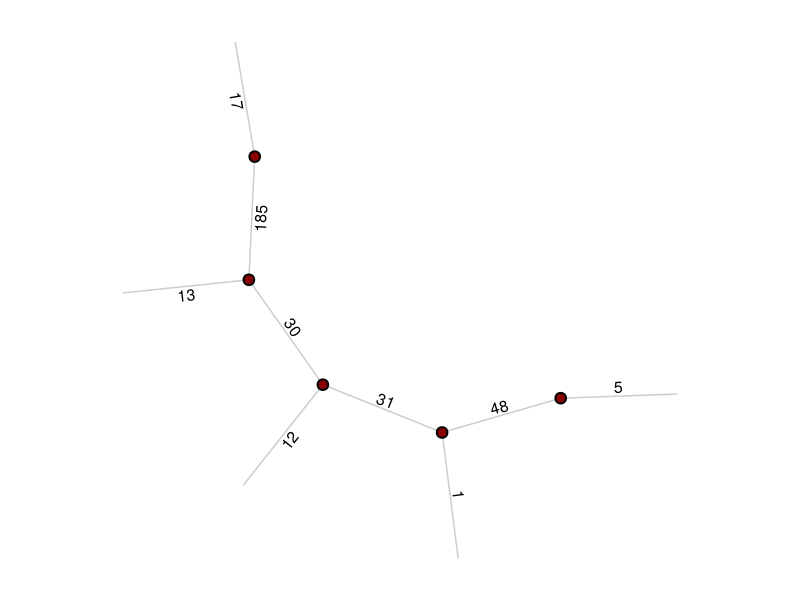

3×9×1 Tensor{Float64, 3, Array{Float64, 3}}:
[:, :, 1] =
 0.232399  0.860812  0.440777  0.136488  …  0.426648  0.553253  0.619428
 0.216012  0.118248  0.561257  0.948353     0.875461  0.864208  0.0541827
 0.541042  0.699107  0.801758  0.500041     0.353961  0.460031  0.71644

3×9×1 Tensor{Float64, 3, Array{Float64, 3}}:
[:, :, 1] =
 0.108823  0.981197  0.765277  0.382908  …  0.0761892  0.928214  0.874647
 0.804121  0.140568  0.938309  0.571328     0.399922   0.514959  0.211181
 0.721258  0.264241  0.725519  0.445918     0.54976    0.617549  0.173584

[15, 3, 2, 14, 18]
(ℝ^1 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^1)
┌ CL[6]: TensorMap(ℝ^1 ← ℝ^1)
├── AL[5]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^1)
├── AL[4]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[3]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[2]: TensorMap((ℝ^3 ⊗ ℝ^3) ← ℝ^9)
└── AL[1]: TensorMap((ℝ^1 ⊗ ℝ^3) ← ℝ^3)



5-site FiniteMPS:
┌ CL[6]: TensorMap(ℝ^1 ← ℝ^1)
├── AL[5]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^1)
├── AL[4]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[3]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[2]: TensorMap((ℝ^3 ⊗ ℝ^3) ← ℝ^9)
└── AL[1]: TensorMap((ℝ^1 ⊗ ℝ^3) ← ℝ^3)


In [5]:
using TensorKit
using MPSKit
println(example_cycle)
drawing1 = Makie.plot(mps_network, node_color=[:darkred for i in 1:length(Tenet.tensors(mps_network))], labels=true, layout=Stress(), edge_color=:grey80)
display(drawing1)


function convert_TenetMPS_to_MPSkit(TensorNetwork, left_index)

    ### TODO: Rewrite in terms of contraction instead of adding fake indices

    Tens = Tenet.tensors(TensorNetwork)
    additional_fake_indices_of_size1 = [Symbol("f1"), Symbol("f2")]
    t_compat = []

    i = 1
    for t in Tens
        
        if length(inds(t)) == 2
            new_t = Tenet.Tensor(reshape(t.data, (size(t.data)[1], size(t.data)[2], 1)), (inds(t)..., additional_fake_indices_of_size1[i]))
            display(new_t)
            i += 1
            push!(t_compat, new_t)
            continue
        end
        push!(t_compat, t)
    end

    TN_compat = Tenet.TensorNetwork(t_compat)
    
    global ids =0 

    T_ordered = []

    for i in 1:length(Tenet.tensors(TN_compat))
        if i == 1
            for t in Tenet.tensors(TN_compat)
                ids = inds(t)

                if !isempty(intersect(inds(t), [left_index]))
                    push!(T_ordered, t)
                    break
                end
            end
        end


        for t in Tenet.tensors(TN_compat)
            if t ∉ T_ordered
                if !isempty(intersect(inds(t), ids))
                    push!(T_ordered, t)
                    ids = inds(t)
                end
            end
        end
    end

    extracted_maps = []

    for (i, t) in enumerate(T_ordered)
        
        if i == 1
            push!(extracted_maps, TensorMap(t.data, ℝ^(size(t, inds(t)[3])) ⊗ ℝ^(size(t, inds(t)[1])), ℝ^(size(t, inds(t)[2]))))
            continue
        end

        if i == length(T_ordered)
            push!(extracted_maps, TensorMap(t.data, ℝ^(size(t, inds(t)[2])) ⊗ ℝ^(size(t, inds(t)[1])), ℝ^(size(t, inds(t)[3]))))

            break
        end

        push!(extracted_maps, TensorMap(t.data, ℝ^(size(t, inds(t)[1])) ⊗ ℝ^(size(t, inds(t)[3])), ℝ^(size(t, inds(t)[2]))))

    end


    
    extracted_maps = [map for map in extracted_maps]

    for map in extracted_maps
        println(codomain(map), domain(map))
    end

    mps = FiniteMPS(extracted_maps)
    println(mps)
    return mps
end

mps_exact = convert_TenetMPS_to_MPSkit(mps_network, Symbol(17))



In [7]:
### Code for calling the approximation function and regenerating an MPS with approximated bond dimensions

# initialize random tensor maps with the correct sizes for the approximated MPS 
mps_exact = convert_TenetMPS_to_MPSkit(mps_network, Symbol(17))
# Access the MPS object (replace with your actual MPS)
L = length(mps_exact)
mps_approximation = FiniteMPS(rand, Float64, L, ℝ^3, ℝ^1)
Identity_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(mps_approximation)), physicalspace(mps_approximation, i))) for i in 1:length(mps_approximation)]) # corresponding identity operator as an MPO

Identity_MPO = DenseMPO([MPSKit.add_util_leg(id(storagetype(MPSKit.site_type(mps_exact)), physicalspace(mps_exact, i))) for i in 1:length(mps_exact)]) # corresponding identity operator as an MPO
println("To be approximated:")
println(typeof(mps_exact))
println(mps_exact)
println(norm(mps_exact))

println("Identity_MPO:")
println(typeof(Identity_MPO))

println("To be approximated into:")
println(typeof(mps_approximation))



alg = DMRG(; verbose=true) # DMRG as approximation algorithm
mps_new, = approximate(mps_approximation, (Identity_MPO, mps_exact), alg)

println("Approximated MPS STATE:")
println(typeof(mps_new))
println(mps_new)
println(norm(mps_new))
println("error 1 - Fidelity = ", 1-dot(mps_new, mps_exact)^2/(dot(mps_new, mps_new)*dot(mps_exact, mps_exact)))


3×9×1 Tensor{Float64, 3, Array{Float64, 3}}:
[:, :, 1] =
 0.232399  0.860812  0.440777  0.136488  …  0.426648  0.553253  0.619428
 0.216012  0.118248  0.561257  0.948353     0.875461  0.864208  0.0541827
 0.541042  0.699107  0.801758  0.500041     0.353961  0.460031  0.71644

3×9×1 Tensor{Float64, 3, Array{Float64, 3}}:
[:, :, 1] =
 0.108823  0.981197  0.765277  0.382908  …  0.0761892  0.928214  0.874647
 0.804121  0.140568  0.938309  0.571328     0.399922   0.514959  0.211181
 0.721258  0.264241  0.725519  0.445918     0.54976    0.617549  0.173584

(ℝ^1 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^9)
(ℝ^9 ⊗ ℝ^3)ProductSpace(ℝ^1)
┌ CL[6]: TensorMap(ℝ^1 ← ℝ^1)
├── AL[5]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^1)
├── AL[4]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[3]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[2]: TensorMap((ℝ^3 ⊗ ℝ^3) ← ℝ^9)
└── AL[1]: TensorMap((ℝ^1 ⊗ ℝ^3) ← ℝ^3)

To be approximated:
FiniteMPS{TrivialTensorMap{CartesianSpace, 2, 1, Matrix{Float64}}, TrivialTensorMap{CartesianSpace, 1, 1, Matrix{Float64}}}
┌ CL[6]: TensorMap(ℝ^1 ← ℝ^1)
├── AL[5]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^1)
├── AL[4]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[3]: TensorMap((ℝ^9 ⊗ ℝ^3) ← ℝ^9)
├── AL[2]: TensorMap((ℝ^3 ⊗ ℝ^3) ← ℝ^9)
└── AL[1]: TensorMap((ℝ^1 ⊗ ℝ^3) ← ℝ^3)

170.0433761648003
Identity_MPO:
DenseMPO{TrivialTensorMap{CartesianSpace, 2, 2, Matrix{Float64}}}
To be approximated into:
FiniteMPS{TrivialTensorMap{CartesianSpace, 2, 1, Matrix{Float64}}, TrivialTensorMap{CartesianSpace, 1, 1, Matrix{Float64}}}
Ap

┌ Info: dmrg iter 0 error 0.9884608896773479
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:73
┌ Info: dmrg iter 1 error 0.009902133437788218
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:73
┌ Info: dmrg iter 2 error 7.664037722045182e-6
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:73
┌ Info: dmrg iter 3 error 8.667435150026001e-9
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:73
┌ Info: dmrg iter 4 error 1.2773382548486697e-11
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:73
┌ Info: dmrg iter 5 error 2.1282018265090666e-14
└ @ MPSKit /home/bart/.julia/packages/MPSKit/atykv/src/algorithms/approximate/fvomps.jl:73
